In [ ]:
pip install pandas numpy matplotlib seaborn wordcloud nltk tensorflow

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
df = pd.read_csv('spam_ham_dataset.csv', sep=',')
df.columns = df.columns.str.strip()

In [ ]:
df

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess(text):
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    return ' '.join(tokens)

df['cleaned_text'] = df['text'].apply(preprocess)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
y = df['label_num']

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

df = pd.read_csv('spam_ham_dataset.csv', sep=',')
df.columns = df.columns.str.strip()

nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess(text):
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    return ' '.join(tokens)

df['cleaned_text'] = df['text'].apply(preprocess)

X = df['cleaned_text']
y = df['label_num']

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess(text):
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    return ' '.join(tokens)

df['cleaned_text'] = df['text'].apply(preprocess)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


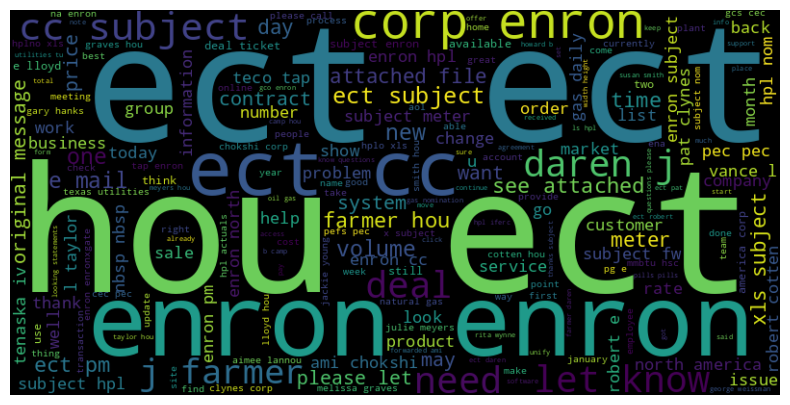

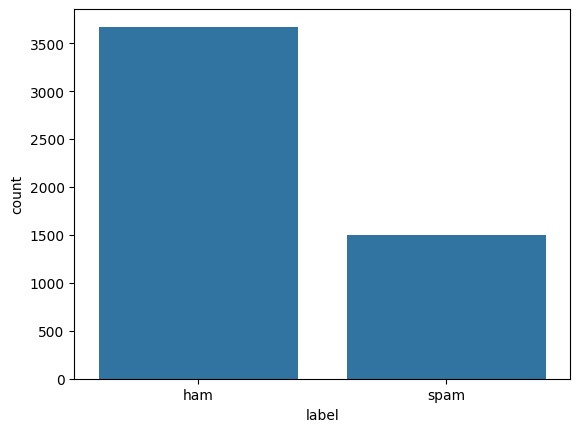

In [ ]:
plt.figure(figsize=(10, 5))
wordcloud = WordCloud(width=800, height=400).generate(' '.join(df['cleaned_text']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

sns.countplot(x='label', data=df)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X = df['cleaned_text']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_vec.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.fit(X_train_vec, y_train.map({'ham':0, 'spam':1}), epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
104/104 ━━━━━━━━━━━━━━━━━━━━ 11s 107ms/step - accuracy: 1.0000 - loss: 7.6598e-04 - val_accuracy: 0.9952 - val_loss: 0.0237
Epoch 2/5
104/104 ━━━━━━━━━━━━━━━━━━━━ 19s 89ms/step - accuracy: 1.0000 - loss: 7.1608e-04 - val_accuracy: 0.9952 - val_loss: 0.0234
Epoch 3/5
104/104 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - accuracy: 1.0000 - loss: 7.4145e-04 - val_accuracy: 0.9952 - val_loss: 0.0230
Epoch 4/5
104/104 ━━━━━━━━━━━━━━━━━━━━ 9s 88ms/step - accuracy: 1.0000 - loss: 4.5106e-04 - val_accuracy: 0.9952 - val_loss: 0.0227
Epoch 5/5
104/104 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - accuracy: 1.0000 - loss: 4.8995e-04 - val_accuracy: 0.9952 - val_loss: 0.0225


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred = (model.predict(X_test_vec) > 0.5).astype(int)
y_pred = ['spam' if p == 1 else 'ham' for p in y_pred]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Accuracy: 0.991304347826087
Confusion Matrix:
 [[738   4]
 [  5 288]]


In [ ]:
new_emails = ["Heartful Congratulations!You've been Selected for the position of associate engineer!", "There will be match at 7 AM tomorrow.","Congratulations! Click on the below link win Rs 1,00,000."]
new_emails_cleaned = [preprocess(email) for email in new_emails]
new_emails_vec = vectorizer.transform(new_emails_cleaned)

predictions = model.predict(new_emails_vec)
results = ['Spam' if pred > 0.5 else 'Ham' for pred in predictions]
print(results)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
['Ham', 'Ham', 'Spam']
